# <img src="https://img.icons8.com/bubbles/50/000000/mind-map.png" style="height:50px;display:inline"> ECE 046211 - Technion - Deep Learning
---

## HW3 - Sequential Tasks and Training Methods
---

### <img src="https://img.icons8.com/clouds/96/000000/keyboard.png" style="height:50px;display:inline"> Keyboard Shortcuts
---
* Run current cell: **Ctrl + Enter**
* Run current cell and move to the next: **Shift + Enter**
* Show lines in a code cell: **Esc + L**
* View function documentation: **Shift + Tab** inside the parenthesis or `help(name_of_module)`
* New cell below: **Esc + B**
* Delete cell: **Esc + D, D** (two D's)

### <img src="https://img.icons8.com/bubbles/50/000000/information.png" style="height:50px;display:inline"> Students Information
---
* Fill in

|Name     |Campus Email| ID  |
|---------|--------------------------------|----------|
|Student 1| student_1@campus.technion.ac.il| 123456789|
|Student 2| student_2@campus.technion.ac.il| 987654321|


### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
* Maximal garde: 100.
* Submission only in **pairs**. 
    * Please make sure you have registered your group in Moodle (there is a group creation component on the Moodle where you need to create your group and assign members).
* **No handwritten submissions.** You can choose whether to answer in a Markdown cell in this notebook or attach a PDF with your answers.
* <a style='color:red'> SAVE THE NOTEBOOKS WITH THE OUTPUT, CODE CELLS THAT WERE NOT RUN WILL NOT GET ANY POINTS! </a>
* What you have to submit:
    * If you have answered the questions in the notebook, you should submit this file only, with the name: `ece046211_hw3_id1_id2.ipynb`.
    * If you answered the questionss in a different file you should submit a `.zip` file with the name `ece046211_hw3_id1_id2.zip` with content:
        * `ece046211_hw3_id1_id2.ipynb` - the code tasks
        * `ece046211_hw3_id1_id2.pdf` - answers to questions.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Latex in Colab** - in some cases, Latex equations may no be rendered. To avoid this, make sure to not use *bullets* in your answers ("* some text here with Latex equations" -> "some text here with Latex equations").

### <img src="https://img.icons8.com/dusk/64/000000/online.png" style="height:50px;display:inline"> Working Online and Locally
---
* You can choose your working environment:
    1. `Jupyter Notebook`, **locally** with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or **online** on <a href="https://colab.research.google.com/">Google Colab</a>
        * Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime`$\rightarrow$ `Change Runtime Type` $\rightarrow$`GPU`.
    2. Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both allow editing and running Jupyter Notebooks.

* Please refer to `Setting Up the Working Environment.pdf` on the Moodle or our GitHub (https://github.com/taldatech/ee046211-deep-learning) to help you get everything installed.
* If you need any technical assistance, please go to our Piazza forum (`hw3` folder) and describe your problem (preferably with images).

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Part 1 - Theory](#-Part-1---Theory)
    * [Q1 - Transformer Encoding](#-Question-1---Transformer-Encoding) 
    * [Q2 - Preventing Variance Explosion](#-Question-2---Preventing-Variance-Explosion)
    * [Q3 - Recurrent Neural Networks](#-Question-3---Recurrent-Neural-Networks)
* [Part 2 - Code Assignments - Sequence-to-Sequence with Transformers](#-Part-2---Code-Assignments)
    * [Task 1 - Loading and Observing the Data](#-Task-1----Loading-and-Observing-the-Data)
    * [Task 2 - Preparing the Data - Separating to Inputs and Targets](#-Task-2----Preparing-the--Data---Separating-to-Inputs-and-Targets)
    * [Task 3 - Define Hyperparameters and Initialize the Model](#-Task-3----Define-Hyperparameters-and-Initialize-the-Model)
    * [Task 4 - Train and Evaluate the Language Model](#-Task-4----Train-and-Evaluate-the-Language-Model)
    * [Task 5 - Generate Sentences](#-Task-5----Generate-Sentences)
* [Credits](#-Credits)

### <img src="https://img.icons8.com/cute-clipart/64/000000/ball-point-pen.png" style="height:50px;display:inline"> Part 1 - Theory
---
* You can choose whether to answser these straight in the notebook (Markdown + Latex) or use another editor (Word, LyX, Latex, Overleaf...) and submit an additional PDF file, **but no handwritten submissions**.
* You can attach additional figures (drawings, graphs,...) in a separate PDF file, just make sure to refer to them in your answers.

* $\large\LaTeX$ <a href="https://kapeli.com/cheat_sheets/LaTeX_Math_Symbols.docset/Contents/Resources/Documents/index">Cheat-Sheet</a> (to write equations)
    * <a href="http://tug.ctan.org/info/latex-refsheet/LaTeX_RefSheet.pdf">Another Cheat-Sheet</a>

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 1 - Transformer Encoding
---
In the following question we will assume we are given a Transformer capable of sentences of up to $L$ tokens, where every token is represented by a $d$-dimensional vector.
1. Explain what a Positional Encoding is, why is it needed, and how it works.
2. One suggested encoding was to assign a number in range $[0,1]$ to each word as follows: For a sentence of length $N\leq L$, add $$\frac{t}{N-1}$$ to the $t$-th word. This means we add $0$ to the first word and $1$ to the final word. What issue can arise from this encoding? Note that the length of each sentence $N$ can differ between sentences.
3. Another suggested encoding was to add $1$ to the first word, $2$ to the second and so on. Would this be a good encoding? Explain your answer.

From here on out, we will use the following encoding - let $0\leq t < N, 0\leq k<d$, we define
$$P_{t,k}=\begin{bmatrix}
\sin (\omega_k t)\\
\cos (\omega_k t)
\end{bmatrix} $$
where $\omega_k=10000^{-2k/d}$.
The encoding of word $t$ is a $d$-dimensional vector of pairs $P_{t,i}$:
$$P_{t}=\begin{bmatrix}
\sin (\omega_1 t)\\
\cos (\omega_1 t) \\
\vdots\\
\sin (\omega_{d/2} t)\\
\cos (\omega_{d/2} t) 
\end{bmatrix} $$

4. Explain why this gives a unique encoding for each word in the sentence regardless of its length $N$.
5. Show that we can linearly transform $P_{t,k}$ via offset, meaning that for any offset $\tau$ there is a matrix 
$M_{k}^{\tau}\in \mathbb{R}^{2\times 2}$ such that
 $$ P_{t+\tau,k}=M_{k}^{\tau} P_{t,k}$$
Hint: remember that $$\sin(\alpha+\beta)=\sin(\alpha)\cos(\beta)+\cos(\alpha)\sin(\beta)$$
$$\cos(\alpha+\beta)=\cos(\alpha)\cos(\beta)-\sin(\alpha)\sin(\beta)$$

6. Extend this to $P_{t}$, show that for $M^{\tau}\in \mathbb{R}^{d\times d}$
$$P_{t+\tau}=M^{\tau} P_{t}$$

### Answer

1. Positional Encoding is needed in Transformer architectures to maintain the positional information of the input sentence. The encoding works by adding position-dependent vectors to the word embeddings, allowing the model to understand the relative or absolute positions of words in the sequence.

2. Using $\frac{t}{N-1}$ as positional encoding has several issues:
    * When $N=1$, we have division by zero.
    * Different sentences will have different positional encodings for the same relative position. For example in a sentence of length 4, position 1 gets encoding $0.33$, while in a sentence of length 10, position 1 gets 0.11.
    * This makes it harder for the model to learn potion-dependent patterns across sentences of different lengths.

3. Adding sequential numbers $(1,2,3,...)$ would also not be a good encoding, because:
    * It doesn't bound the values, which could lead to numerical instability for very long sequences.
    * The absolute differences between positions grow linearly with sequence length.
    * It doesn't capture any meaningful relationship between positions (like periodicity or relative distances).

4. The sinusodial encoding is unique for each position t, because:
    * Each dimension $k$ uses a different frequency $\omega_k$.
    * The frequencies form a geometric sequence (decreasing by factor of $10000^{2/d}$).
    * This creates a unique pattern of sine and cosine values for each position.
    * This encoding is independent of sequence length $N$.
    * It captures both absolute position (through the unique pattern) and relative position (through the linear transformation property we'll prove next).

5. For the linear transformation property, let's prove it: $P_{t+\tau,k} = \begin{bmatrix} \sin(\omega_k(t+\tau) \\ \cos(\omega_k(t+\tau)) \end{bmatrix})$

Using the addition formulas:

$$\sin(\omega_k(t+\tau)) = \sin(\omega_k t)\cos(\omega_k \tau) + \cos(\omega_k t)\sin(\omega_k \tau)$$
$$\cos(\omega_k(t+\tau)) = \cos(\omega_k t)\cos(\omega_k \tau) - \sin(\omega_k t)\sin(\omega_k \tau)$$

Therefore:

$$P_{t+\tau,k} = \begin{bmatrix} \sin(\omega_k t)\cos(\omega_k \tau) + \cos(\omega_k t)\sin(\omega_k \tau) \\ \cos(\omega_k t)\cos(\omega_k \tau) - \sin(\omega_k t)\sin(\omega_k \tau) \end{bmatrix} = \begin{bmatrix} \cos(\omega_k \tau) & \sin(\omega_k \tau) \\ -\sin(\omega_k \tau) & \cos(\omega_k \tau) \end{bmatrix} \cdot \begin{bmatrix} \sin(\omega_k(t) \\ \cos(\omega_k(t)) \end{bmatrix} = M_k^\tau \cdot P_{t,k}$$

$$M_k^\tau = \begin{bmatrix} \cos(\omega_k \tau) & \sin(\omega_k \tau) \\ -\sin(\omega_k \tau) & \cos(\omega_k \tau) \end{bmatrix}$$

6. For the full vector $P_t$, we can construct $M^\tau$ as a block diagonal matrix:
$M^\tau = \begin{bmatrix} M_1^\tau & 0 & \cdots & 0 \\ 0 & M_2^\tau & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & M_{d/2}^\tau \end{bmatrix}$

This matrix will transform each pair of dimensions according to its corresponding $M_k^\tau$, proving that $P_{t+\tau} = M^\tau P_t$.

Each $M_k^\tau$ is a 2×2 block on the diagonal, and 0 represents a 2×2 zero matrix.
When we multiply $M^\tau$ by $P_t$:

The first 2×2 block $M_1^\tau$ transforms $[\sin(\omega_1 t), \cos(\omega_1 t)]$
The second 2×2 block $M_2^\tau$ transforms $[\sin(\omega_2 t), \cos(\omega_2 t)]$
And so on...

The zeros ensure that each pair of coordinates is only transformed by its corresponding $M_k^\tau$.
Therefore, $M^\tau P_t$ produces exactly $P_{t+\tau}$, which means:
$P_{t+\tau} = M^\tau P_t$

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 2 - Preventing Variance Explosion
---
This question relates to lectures 8-9 (from slide 7):

Find an initializtion scheme such that $$ \forall l, i,: \text{(1) } \mathbb{E}\left[F_l(u_l)|u_l\right]=0, \text{ (2) } Var(u_l[i]) = 1, $$ assuming skip connections: $u_{l+1} = u_l + F_l(u_l)$ with a single skip $F_l(u_l)=W_l\phi(u_l)+b_l$ and the activation is ReLU: $\phi(x) = \text{ReLU}(x) = \max(0,x)$. 

First, let's understand what we're looking for:

* We need to initialize weights $\mathbf{W}_l$ and biases $b_l$
* For each layer $l$, we want zero mean: $\mathbb{E}[F_l(u_l)|u_l]=0$
* And the variance for each component: $Var(u_l[i])=1$


From condition (1), for any input $u_l$:
$$\mathbb{E}[F_l(u_l)|u_l] = \mathbb{E}[\mathbf{W}_l\phi(u_l)+b_l|u_l] = \mathbb{E}[W_l\cdot \max(0,u_l)|u_l] + \mathbb{E}[b_l|u_l] = 0$$

Since we have ReLU activation:
$\phi(x) = \max(0,x)$
We need the entire residual block $F_l$ needs to have zero mean.

Now, let's evaluate $Var(u_l[i])$, for condition (2), by law of total variance:
$$Var(u_{l+1}[i]) = \mathbb{E}[Var(u_{l+1}[i]|u_l[i])] + Var(\mathbb{E}[u_{l+1}[i]|u_l[i]])$$

From condition 1:
$$Var(u_{l+1}[i]|u_l[i]) = Var(F_l(u_l)[i]|u_l[i])$$

Since $u_l[i]$ is constant given $u_l[i]$
$$Var(u_{l+1}[i]) = \mathbb{E}[Var(F_l(u_l)[i]|u_l[i])] + Var(u_l[i])$$

For $Var(u_{l+1}[i])=1$:
$$1 = \mathbb{E}[Var(F_l(u_l)[i]|u_l[i])] + 1$$

Therefore,

$$\mathbb{E}[Var(F_l(u_l)[i]|u_l[i])] = 0$$

This implies $Var(F_l(u_l)[i]|u_l[i])=0$ for all $u_l[i]$, which means $F_l$ must be constant (zero) given any input.

This means that the solution that satisfies all these conditions is:
* Initialize $\mathbf{W}_l = \mathbf{0}$ (zero matrix)
* Set $b_l = 0$

This initialization works because:

With $\mathbf{W}_l=\mathbf{0}$ and $b_l=0$, we have $F_l(u_l)=0$ for all inputs. 
Therefore $\mathbb{E}[F_l(u_l)|u_l]=0$ is trivially satisfied. 

The skip connection becomes $u_{l+1}=u_l$, preserving the variance of 1 if we start with $Var(u_0[i])=1$. 

## <img src="https://img.icons8.com/clouds/100/000000/question-mark.png" style="height:50px;display:inline"> Question 3 - Recurrent Neural Networks
---
You are given a recurrent/feedback neural network with LReLU activations $\phi(u) = \max[pu,u]$, with input $x_t$ and a representation $v_t \in \mathbb{R}^d$ that is updated as follows:
$$ \forall \tau=1,2,...t\:: v_{\tau}=\phi(u_{\tau})\:, u_{\tau} = Wv_{\tau - 1} + B x_{\tau},$$
from initialization $v_0$, and outputs $\hat{y}_t=Cv_t$. The network is trained with GD on a single long series $\{x_{\tau}, y_{\tau}\}_{\tau=1}^t$ with a cost function $\ell(y_t, \hat{y}_t)$ over the last term in the series.

1. Calculate the exact gradient $\frac{\partial \ell}{\partial W[i,j]}$ using Backpropagation through time (BPTT).
2. Recall that calculating the gradient using the method in the previous section there are two issues for $t \to \infty$: (1) the required computational resources grow indefinitely, and (2) the gradients explode or vanish. For each problem: explain it, provide an example for a method to alleviate it and describe any limitations of this method.

#### Answer
$$ \forall \tau=1,2,...t\:: v_{\tau}=\phi(Wv_{\tau - 1} + B x_{\tau})\:, u_{\tau} = Wv_{\tau - 1} + B x_{\tau}, \hat{y}_t=Cv_t, \phi(u) = \max[pu,u]$$

#### Answer

1.

$$ \forall \tau=1,2,...t\:: v_{\tau}=\phi(Wv_{\tau - 1} + B x_{\tau})\:, u_{\tau} = Wv_{\tau - 1} + B x_{\tau}, \hat{y}_t=Cv_t, \phi(u) = \max[pu,u]$$

The loss depends on W through all time steps up to t, so we need to use the chain rule across time:
$$\frac{\partial \ell}{\partial W[i,j]} = \sum_{\tau=1}^t \frac{\partial \ell}{\partial W[i,j]|_\tau}$$
where $\frac{\partial \ell}{\partial W[i,j]|_\tau}$ is the contribution from time step τ.

Let's work backwards:

$$\frac{\partial \ell}{\partial {v}_t} = \frac{\partial \ell}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial {v}_t} = \frac{\partial \ell}{\partial \hat{y}_t} \cdot C$$
since, $\frac{\partial \hat{y}_t}{\partial v_t} = C$

$$\frac{\partial \ell}{\partial W[i,j]} = \sum_{\tau=1}^t \frac{\partial \ell}{\partial {v}_t} \cdot \frac{\partial {v}_t}{\partial {u}_t}\cdot v_{\tau-1}[j]$$

$$\frac{\partial v_{\tau}}{\partial u_{\tau}} = \phi'(u_{\tau}) = \begin{cases} p & \text{if }u_{\tau} < 0 \\ 1 & \text{if }u_{\tau} > 0 \end{cases}$$

Finally:
$$\frac{\partial \ell}{\partial W[i,j]} = \sum_{\tau=1}^t \frac{\partial \ell}{\partial \hat{y}_\tau} \cdot C \cdot \phi'(u_{\tau}) \cdot v_{\tau-1}[j]$$



2.

**Growing computational resources**:

As sequences get longer, storing and processing each time step becomes computationally demanding. To address this, we can implement intermediate value caching during backpropagation, eliminating the need for repeated computations in the backward pass. While this approach helps with computational efficiency, it comes with a trade-off - the cached values consume significant memory, especially for longer sequences.



**Exploding/vanishing gradients**:

During training, weight updates can become extremely large (exploding) or extremely small (vanishing) as gradients propagate through time steps. A practical solution is gradient clipping, which constrains gradient values within a specified range. However, while this effectively prevents gradient explosion, it doesn't address the vanishing gradient problem, leaving part of the challenge unresolved.

### <img src="https://img.icons8.com/officel/80/000000/code.png" style="height:50px;display:inline"> Part 2 - Code Assignments
---
* You must write your code in this notebook and save it with the output of all of the code cells.
* Additional text can be added in Markdown cells.
* You can use any other IDE you like (PyCharm, VSCode...) to write/debug your code, but for the submission you must copy it to this notebook, run the code and save the notebook with the output.

In [2]:
# this part uses the Wikitext-2 dataset. To access torchtext datasets, please install `torchdata`:
# `pip install torchdata` ir `conda install -c pytorch torchdata` in activated environment 
# or `!pip install torchdata` on colab.
!pip install torchdata
# notes:
# torch=2.0.0 <-> torchtext 0.15.1
# torch=1.13.0 <-> torchtext 0.14.0
# torch=1.12.1 <-> torchtext 0.13.1
# downgrading torchtext example: !pip install torchtext==0.13.1 --no-deps
# torchtext requires the `portalocker` package to download datasets:
!pip install portalocker

In [4]:
# imports for the practice (you can add more if you need)
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import math
from typing import Tuple

# pytorch
import torch
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

# torchtext
import torchtext
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

seed = 211
np.random.seed(seed)
torch.manual_seed(seed)

In [5]:
print(f'pytorch: {torch.__version__}, torchtext: {torchtext.__version__}')

pytorch: 2.0.1, torchtext: 0.15.2+cpu


## <img src="https://img.icons8.com/bubbles/50/000000/workflow.png" style="height:50px;display:inline">  Sequence-to-Sequence with Transformers
---
* In this exercise, you are going to build a language model using PyTroch's Transformer module.
* We will work with the **Wikitext-2** dataset: the WikiText language modeling dataset is a collection of over 100 million tokens extracted from the set of verified Good and Featured articles on Wikipedia.
* After training, you will be able to generate senetences!

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 1  - Loading and Observing the Data
---
1. Run the following cells that define the functions `batchify` and `data_process` and initialize the tokenizer, vocabulary and the WikiText2 train dataset.
2. Create the train, valid and test data using the provided `batchify` function.
5. Print the shape of `train_data`, write in a comment the meaning of each dimension (e.g. `# [meaning of dim1, meaning of dim2]`).
6. Print the first 20 words of one training sample from `train_data`. Use the vocabulary you built to transfer between tokens to words: `itos = vocab.vocab.get_itos()` will give a "int to string" list.

In [6]:
def batchify(data, bsz):
    """Divides the data into bsz separate sequences, removing extra elements
    that wouldn't cleanly fit.

    Args:
        data: Tensor, shape [N]
        bsz: int, batch size

    Returns:
        Tensor of shape [N // bsz, bsz]
    """
    seq_len = data.size(0) // bsz
    data = data[:seq_len * bsz]
    data = data.view(bsz, seq_len).t().contiguous()
    return data.to(device)

In [7]:
def data_process(raw_text_iter: dataset.IterableDataset) -> Tensor:
    """Converts raw text into a flat Tensor."""
    data = [torch.tensor(vocab(tokenizer(item)), dtype=torch.long) for item in raw_text_iter]
    return torch.cat(tuple(filter(lambda t: t.numel() > 0, data)))

In [8]:
train_iter = WikiText2(root="./data", split='train')
tokenizer = get_tokenizer('basic_english')
vocab = build_vocab_from_iterator(map(tokenizer, train_iter), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])

In [9]:
# train_iter was "consumed" by the process of building the vocab,
# so we have to create it again
train_iter, val_iter, test_iter = WikiText2(root="./data")
train_data = data_process(train_iter)
val_data = data_process(val_iter)
test_data = data_process(test_iter)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [10]:
batch_size = 20
eval_batch_size = 10

In [11]:
"""
Your Code Here
"""
train_data = batchify(train_data, batch_size)
val_data = batchify(val_data, eval_batch_size)
test_data = batchify(test_data, eval_batch_size)
print(f'train data shape is {train_data.shape}')
# [sequence_length, batch_size]

itos = vocab.get_itos()
first_sample = train_data[:20, 0] # first 20 tokens from first batch
words = [itos[token.item()] for token in first_sample]
print("First 20 words:\n", ' '.join(words))

train data shape is torch.Size([102499, 20])
First 20 words:
 = valkyria chronicles iii = senjō no valkyria 3 <unk> chronicles ( japanese 戦場のヴァルキュリア3 , lit . valkyria of the


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 2  - Preparing the  Data - Separating to Inputs and Targets
---
* For a language modeling task, the model needs the following words as `Target`.
    * For example, for the senetence "I have a nice dog", the model will be given "I have a nice" as input, and "have a nice dog" as the target.
* Implement (complete) the function `get_batch(source, i, bptt)`: it generates the input and target sequence for the transformer model. It subdivides the source data into chunks of length `bptt`.
    * For example, for `bptt=2` and at `i=0`, the output of `data, target = get_batch(train_data, i=0, bptt=2)`: `data` will be of shape (2, 20), where the batch size is 20 and `target` will be of length 40 (the target for each element is two words, but we flatten `target`).
    * Example: for `bptt=2`, and the ABCDEFG... characters as input, our batches will be in the form of: `data=[a, b], target=[b, c]`. For `bptt=3`: `data=[a, b, c], target=[b, c, d]` and so on. This one example is a batch.
    * Print a sample from `data` and `target`.

In [12]:
"""
Your Code Here
"""
def get_batch(source, i, bptt):
    """
    Args:
        source: Tensor, shape [full_seq_len, batch_size]
        i: int
        bptt: int
    Returns:
        tuple (data, target), where data has shape [seq_len, batch_size] and
        target has shape [seq_len * batch_size]
    """
    seq_len = min(bptt, len(source) - 1 - i)
    data = source[i:i + seq_len]
    target = source[i + 1:i + 1 + seq_len].reshape(-1)
    return data, target

bptt = 2
data, target = get_batch(train_data, i=0, bptt=bptt)
print(f"Data shape: {data.shape}, Target shape: {target.shape}")

print("\nSample:")
print("Data:", ' '.join([itos[idx] for idx in data[:,0]]))
print("Target:", ' '.join([itos[idx] for idx in target[:bptt]]))

Data shape: torch.Size([2, 20]), Target shape: torch.Size([40])

Sample:
Data: = valkyria
Target: valkyria @-@


### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 3  - Define Hyperparameters and Initialize the Model
---
* Define the following hyperparameters (`[a, b]` means in the range between `a` and `b`):
    * Embedding size: choose from `[200, 250]`
    * Number of hidden units: choose from `[200, 250]`
    * Number of layers: choose from `[2, 4]`
    * Number of attention heads: choose from `[2, 4]`
    * Dropout: choose from `[0.0, 0.3]`
    * Loss criterion: `nn.CrossEntropyLoss()`
    * Optimizer: choose from `[SGD, Adam, RAdam]`
    * Learning rate: choose from `[5e-3, 5.0]`
    * Learning Scheduler: `torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)` or any scheduler of your choosing.
    * Transformer LayerNormalization: `post` (`norm_first=False`) or `pre` (`norm_first=True`).
* Intialize an instance of `TransformerModel` (given) and send it to `device`. Note that you need to give it the number of tokens to define the output of the decoder. You should use the number of tokens in the vocabulary. Print the number of tokens,  print **all** the chosen hyper-parameters and print the model (`print(model`).

In [13]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout=0.1, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)
    
class TransformerModel(nn.Module):

    def __init__(self, ntoken, ninp, nhead, nhid, nlayers, dropout=0.5, norm_first=False):
        super(TransformerModel, self).__init__()
        self.pos_encoder = PositionalEncoding(ninp, dropout)
        encoder_layers = TransformerEncoderLayer(ninp, nhead, nhid, dropout, norm_first=norm_first)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.encoder = nn.Embedding(ntoken, ninp)
        self.ninp = ninp
        self.decoder = nn.Linear(ninp, ntoken)

        self.init_weights()

    def generate_square_subsequent_mask(self, sz):
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        self.decoder.bias.data.zero_()
        self.decoder.weight.data.uniform_(-initrange, initrange)

    def forward(self, src, src_mask):
        src = self.encoder(src) * math.sqrt(self.ninp)
        src = self.pos_encoder(src)
        output = self.transformer_encoder(src, src_mask)
        output = self.decoder(output)
        return output

In [18]:
"""
Your Code Here
"""

# Hyperparameters
epochs = 10               # Number of epochs
ntokens = len(vocab)      # Vocabulary size
emsize = 210              # Embedding size
nhid = 240                # Number of hidden units
nlayers = 4               # Number of layers
nhead = 3                 # Number of attention heads
dropout = 0.3             # Dropout rate
norm_first = True         # Transformer LayerNormalization: `post` (`norm_first=False`) or `pre` (`norm_first=True`)
lr=0.5                    # Learning rate

model = TransformerModel(ntoken=ntokens, ninp=emsize, nhead=nhead, nhid=nhid, nlayers=nlayers, dropout=dropout, norm_first=norm_first)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, 0.95)

print(f"Vocabulary size: {ntokens}")
print(f"\nHyperparameters:")
print(f"Number of Epochs: {epochs}")
print(f"Embedding size: {emsize}")
print(f"Hidden size: {nhid}")
print(f"Layers: {nlayers}")
print(f"Attention heads: {nhead}")
print(f"Dropout: {dropout}")
print(f"Normalization: {'pre' if norm_first else 'post'}")
print(f"\nModel architecture:")
print(model)

Vocabulary size: 28782

Hyperparameters:
Number of Epochs: 10
Embedding size: 210
Hidden size: 240
Layers: 4
Attention heads: 3
Dropout: 0.3
Normalization: pre

Model architecture:
TransformerModel(
  (pos_encoder): PositionalEncoding(
    (dropout): Dropout(p=0.3, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=210, out_features=210, bias=True)
        )
        (linear1): Linear(in_features=210, out_features=240, bias=True)
        (dropout): Dropout(p=0.3, inplace=False)
        (linear2): Linear(in_features=240, out_features=210, bias=True)
        (norm1): LayerNorm((210,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((210,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.3, inplace=False)
        (dropout2): Dropout(p=0.3, inplace=False)
      )
    )
  

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 4  - Train and Evaluate the Language Model
---
* Fill in the missing line in the training code and train the model.
* Use `bptt=35`.
* Use the provided function to evaluate it on the validatation set (after each epoch) and on test test (after training is done). **Print and plot** the results (loss and perplexity).
* If you see that the performance does not improve, go back to Task 3 and re-think you hyper-parameters.

In [15]:
def evaluate(model, eval_data):
    model.eval()  # turn on evaluation mode
    total_loss = 0.
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)
    with torch.no_grad():
        for i in range(0, eval_data.size(0) - 1, bptt):
            data, targets = get_batch(eval_data, i, bptt)
            seq_len = data.size(0)
            if seq_len != bptt:
                src_mask = src_mask[:seq_len, :seq_len]
            output = model(data, src_mask)
            output_flat = output.view(-1, ntokens)
            total_loss += seq_len * criterion(output_flat, targets).item()
    return total_loss / (len(eval_data) - 1)

In [16]:
"""
Your Code Here
"""
def train(model, bptt):
    model.train()  # turn on train mode
    total_loss = 0.
    log_interval = 200
    start_time = time.time()
    src_mask = model.generate_square_subsequent_mask(bptt).to(device)

    num_batches = len(train_data) // bptt
    for batch, i in enumerate(range(0, train_data.size(0) - 1, bptt)):
        data, targets = get_batch(train_data, i, bptt)
        seq_len = data.size(0)
        if seq_len != bptt:  # only on last batch
            src_mask = src_mask[:seq_len, :seq_len]
        output = model(data,src_mask)
        loss = criterion(output.view(-1, ntokens), targets)

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()

        total_loss += loss.item()
        if batch % log_interval == 0 and batch > 0:
            lr = scheduler.get_last_lr()[0]
            ms_per_batch = (time.time() - start_time) * 1000 / log_interval
            cur_loss = total_loss / log_interval
            ppl = math.exp(cur_loss)
            print(f'| epoch {epoch:3d}/{epochs:3d} | {batch:5d}/{num_batches:5d} batches | '
                  f'lr {lr:02.4f} | ms/batch {ms_per_batch:5.2f} | '
                  f'loss {cur_loss:5.2f} | ppl {ppl:8.2f}')
            total_loss = 0
            start_time = time.time()

| epoch   1/ 10 |   200/ 2928 batches | lr 0.5000 | ms/batch  6.02 | loss  7.95 | ppl  2822.43
| epoch   1/ 10 |   400/ 2928 batches | lr 0.5000 | ms/batch  5.94 | loss  7.17 | ppl  1296.86
| epoch   1/ 10 |   600/ 2928 batches | lr 0.5000 | ms/batch  5.93 | loss  6.90 | ppl   996.33
| epoch   1/ 10 |   800/ 2928 batches | lr 0.5000 | ms/batch  5.93 | loss  6.79 | ppl   893.06
| epoch   1/ 10 |  1000/ 2928 batches | lr 0.5000 | ms/batch  5.93 | loss  6.68 | ppl   799.47
| epoch   1/ 10 |  1200/ 2928 batches | lr 0.5000 | ms/batch  5.93 | loss  6.67 | ppl   789.79
| epoch   1/ 10 |  1400/ 2928 batches | lr 0.5000 | ms/batch  5.95 | loss  6.58 | ppl   720.51
| epoch   1/ 10 |  1600/ 2928 batches | lr 0.5000 | ms/batch  5.93 | loss  6.56 | ppl   707.48
| epoch   1/ 10 |  1800/ 2928 batches | lr 0.5000 | ms/batch  5.93 | loss  6.47 | ppl   648.48
| epoch   1/ 10 |  2000/ 2928 batches | lr 0.5000 | ms/batch  5.93 | loss  6.47 | ppl   645.47
| epoch   1/ 10 |  2200/ 2928 batches | lr 0.5000 

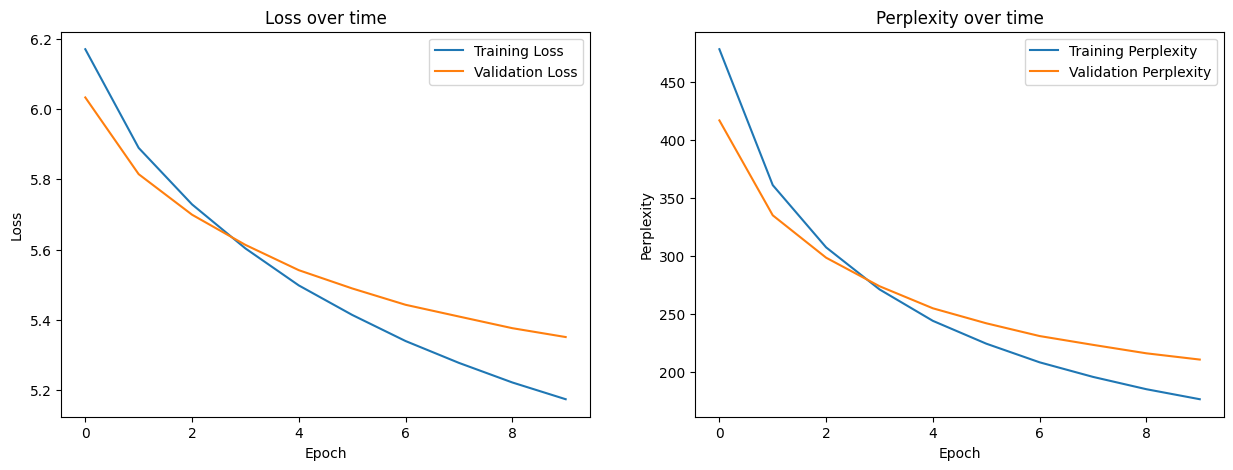

In [19]:
"""
Your Code Here
"""
best_val_loss = float("inf")
train_losses = []
val_losses = []
train_ppls = []
val_ppls = []
best_model = None
bptt = 35

for epoch in range(1, epochs + 1):
    epoch_start_time = time.time()
    train(model, bptt)
    
    train_loss = evaluate(model, train_data)
    train_losses.append(train_loss)
    train_ppls.append(math.exp(train_loss))
    
    val_loss = evaluate(model, val_data)
    val_losses.append(val_loss)
    val_ppls.append(math.exp(val_loss))
    
    print('-' * 89)
    print('| end of epoch {:3d}/{:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
          'valid ppl {:8.2f}'.format(epoch, epochs, (time.time() - epoch_start_time),
                                     val_loss, math.exp(val_loss)))
    print('-' * 89)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model

    scheduler.step()
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.plot(train_losses, label='Training Loss')
ax1.plot(val_losses, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.set_title('Loss over time')

ax2.plot(train_ppls, label='Training Perplexity')
ax2.plot(val_ppls, label='Validation Perplexity')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Perplexity')
ax2.legend()
ax2.set_title('Perplexity over time')

plt.show()

### <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Task 5  - Generate Sentences
---
Use the following function to generate 3 sentences of length 20, and print them. Do they make sense? (you can compare generated sentences over epochs, to see if some logic is gained during training).

In [20]:
def generate(model, vocab, nwords=100, temp=1.0):
    model.eval()
    ntokens = len(vocab)
    itos = vocab.vocab.get_itos()
    model_input = torch.randint(ntokens, (1, 1), dtype=torch.long).to(device)
    words = []
    with torch.no_grad():
        for i in range(nwords):
            output = model(model_input, None)
            word_weights = output[-1].squeeze().div(temp).exp().cpu()
            word_idx = torch.multinomial(word_weights, 1)[0]
            word_tensor = torch.Tensor([[word_idx]]).long().to(device)
            model_input = torch.cat([model_input, word_tensor], 0)
            word = itos[word_idx]
            words.append(word)
    return words

In [23]:
"""
Your code Here
"""
for i in range(3):
    sentence = generate(model, vocab, nwords=20)
    print(' '.join(sentence))

and brooch . this claim the victim was later used in a large member of the games in a series
, <unk> or <unk> or <unk> species are smash to <unk> from <unk> . prohibiting to help to the sun
was introduced in may 2006 after taking a tournament or a short of his grupos . = = = reception


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons made by <a href="https://www.flaticon.com/authors/becris" title="Becris">Becris</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a>
* Icons from <a href="https://icons8.com/">Icons8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/